Goal: determine the current state of the housing market as compared to the historic state and make predictions on where it is headed. 

Future todos: 
- Automate the data pulls 

Sources:
- [HOUSEHOLD DEBT AND CREDIT REPORT](https://www.newyorkfed.org/microeconomics/hhdc)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

color_list = list(mcolors.TABLEAU_COLORS.keys())
plt.rcParams["figure.figsize"] = (12, 4)

recessions = pd.read_excel('data/List_of_recessions_in_the_United_States.xlsx')
recessions['Start'] = pd.to_datetime(recessions['Start'])
recessions['End'] = pd.to_datetime(recessions['End'])
display(recessions.tail())

,Name,Start,End,Peak unemployment,GDP decline (peak to trough),Characteristics
10,1981–1982 recession,1981-07-01,1982-11-01,0.108,−2.7%,The Iranian Revolution sharply increased the p...
11,Early 1990s recession,1990-07-01,1991-03-01,0.078,−1.4%,After the lengthy peacetime expansion of the 1...
12,Early 2000s recession,2001-03-01,2001-11-01,0.063,−0.3%,The 1990s were the longest period of economic ...
13,Great Recession,2007-12-01,2009-06-01,0.100,−5.1%,The subprime mortgage crisis led to the collap...
14,COVID-19 recession,2020-02-01,2020-04-01,0.147,−19.2%,The economic effects of the pandemic were seve...


In [9]:
# Function to convert mixed date formats to datetime
def convert_to_datetime(date):
    #  Handling '2003-03-01 00:00:00' and '11:Q2' formating
    if ' ' not in date:
        year, quarter = date.split(':')
        year = '20' + year  # Assuming the years are in the 2000s
        quarter_month = {'Q1': '03-01', 'Q2': '06-01', 'Q3': '09-01', 'Q4': '12-01'}
        return pd.to_datetime(f'{year}-{quarter_month[quarter]}')
    else:  # Handling the standard date format
        return pd.to_datetime(date)
    
def clean_date_column(df):
    df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
    df['Date'] = df['Date'].astype(str)
    df['Date'] = df['Date'].apply(convert_to_datetime)
    return df

def drop_unnamed_columns(df):
    """Drops any columns from the DataFrame that contain 'Unnamed' in the column name."""
    return df.loc[:, ~df.columns.str.contains('^Unnamed')]

def prep_newyorkfed_data(df):
    df = clean_date_column(df)
    return drop_unnamed_columns(df)

loan_types = pd.read_excel('data/newyorkfed_household_debit_and_credit_report.xlsx', sheet_name='Page 4 Data', header=3)
loan_types = prep_newyorkfed_data(loan_types)
loan_types.head()

,Date,Auto Loan,Credit Card,Mortgage,HE Revolving
0,2003-03-01,73.51,469.81,79.54,13.41
1,2003-06-01,70.76,468.94,79.73,14.22
2,2003-09-01,75.94,457.64,79.34,15.55
3,2003-12-01,77.64,452.71,83.42,16.10
4,2004-03-01,79.22,449.62,83.95,16.73


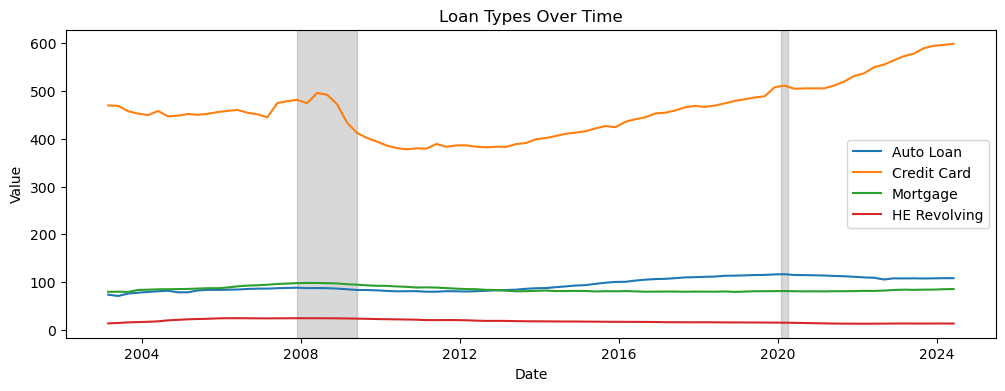

In [10]:
for i, column in enumerate(loan_types.columns[1:]):
    plt.plot(loan_types['Date'], loan_types[column], label=column, color=color_list[i])

# Adding shaded regions
for _, row in recessions.iterrows():
    if row['End'] > loan_types['Date'].min():
        plt.axvspan(row['Start'], row['End'], color='gray', alpha=0.3)

plt.title('Loan Types Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

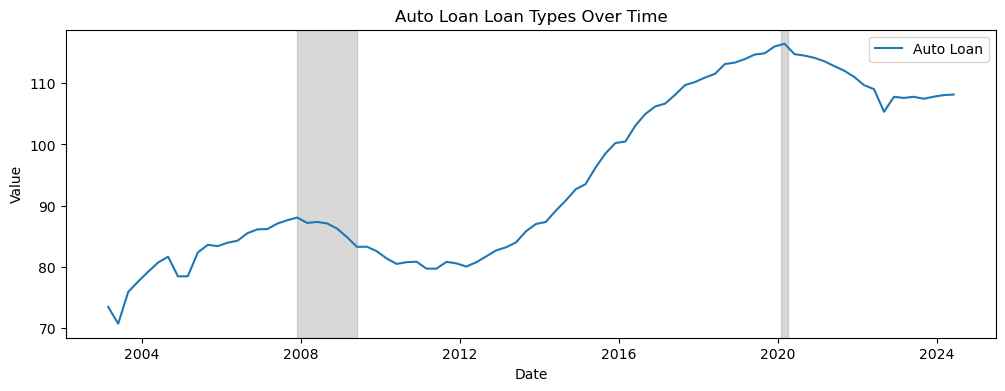

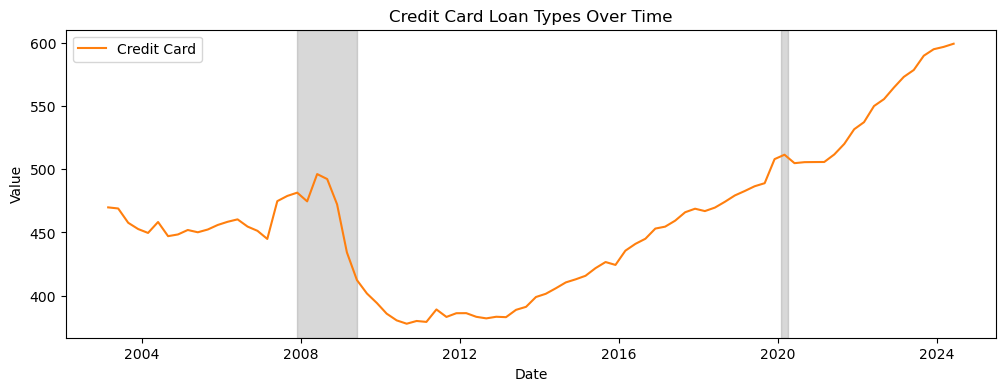

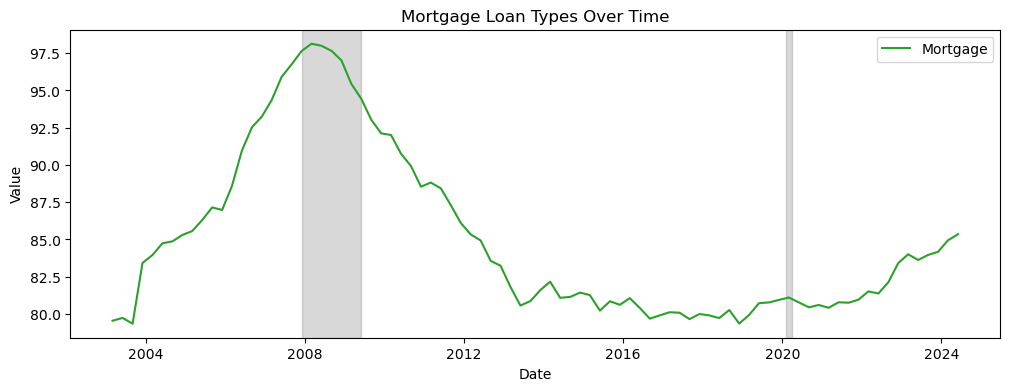

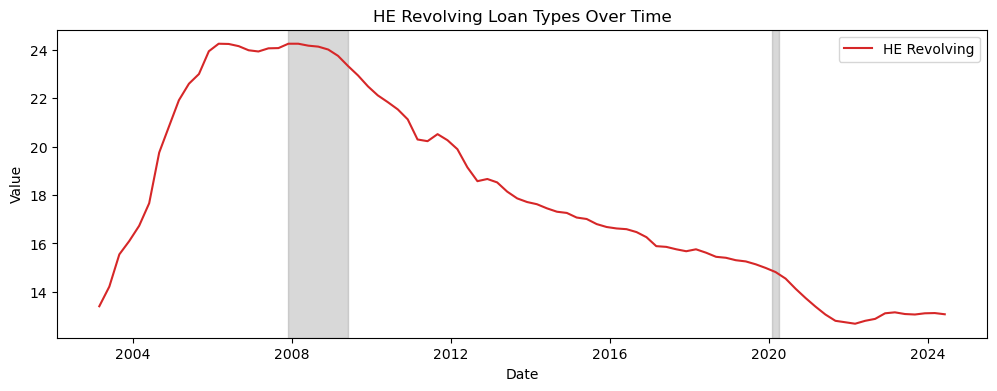

In [11]:
for i, column in enumerate(loan_types.columns[1:]):
    plt.plot(loan_types['Date'], loan_types[column], label=column, color=color_list[i])
    
    # Adding shaded regions
    for _, row in recessions.iterrows():
        if row['End'] > loan_types['Date'].min():
            plt.axvspan(row['Start'], row['End'], color='gray', alpha=0.3)

    plt.title(f'{column} Loan Types Over Time')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

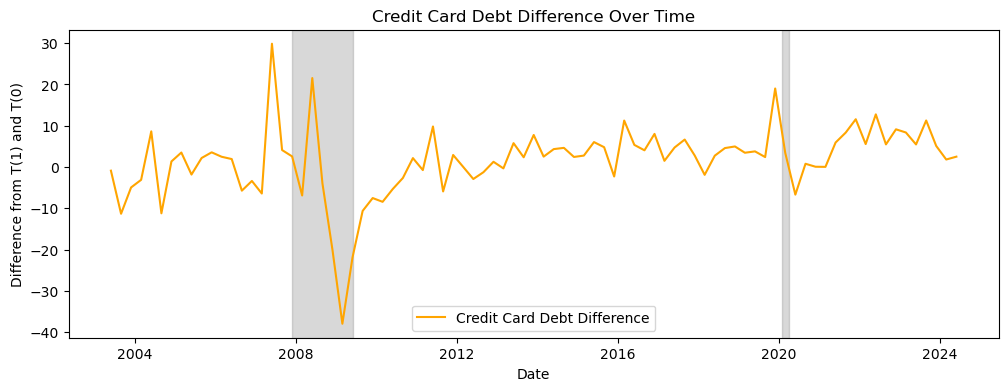

In [256]:
plt.plot(loan_types['Date'], loan_types['Credit Card'].diff(), color='orange', label='Credit Card Debt Difference')

# Adding shaded regions
for _, row in recessions.iterrows():
    if row['End'] > loan_types['Date'].min():
        plt.axvspan(row['Start'], row['End'], color='gray', alpha=0.3)

plt.title('Credit Card Debt Difference Over Time')
plt.xlabel('Date')
plt.ylabel('Difference from T(1) and T(0)')
plt.legend()
plt.show()

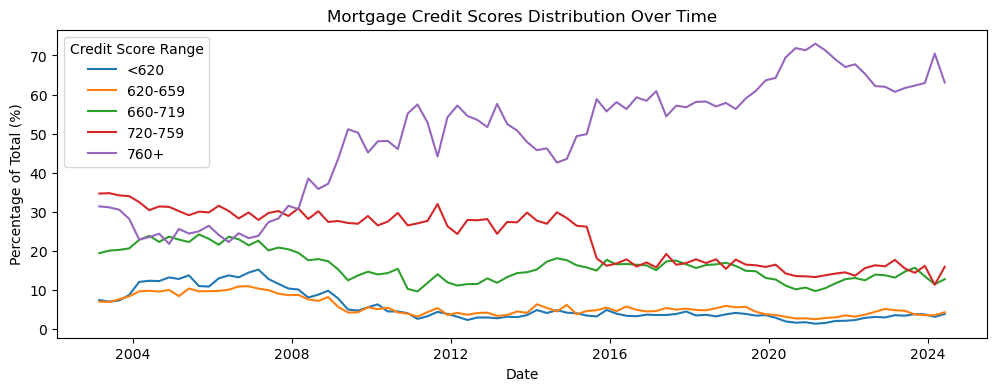

In [13]:
mortgage_credit_scores = pd.read_excel('data/newyorkfed_household_debit_and_credit_report.xlsx', sheet_name='Page 6 Data', header=3)
mortgage_credit_scores = prep_newyorkfed_data(mortgage_credit_scores)

# Convert each credit score bin to a percentage of the total
for column in mortgage_credit_scores.columns[1:-1]:  # Excluding Date and TOTAL columns
    mortgage_credit_scores[column + ' (%)'] = (mortgage_credit_scores[column] / mortgage_credit_scores['TOTAL']) * 100
    
for i, column in enumerate(['<620', '620-659', '660-719', '720-759', '760+']):
    plt.plot(mortgage_credit_scores['Date'], mortgage_credit_scores[column + ' (%)'], label=column, color=color_list[i])

plt.title('Mortgage Credit Scores Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage of Total (%)')
plt.legend(title='Credit Score Range')
plt.show()

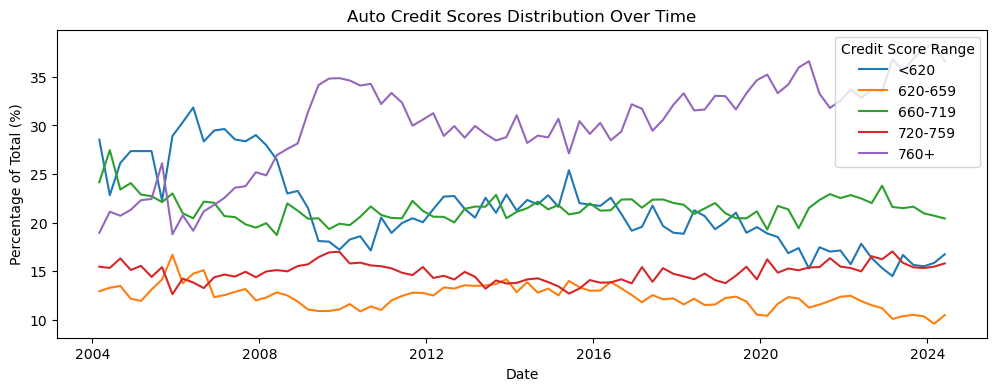

In [12]:
auto_credit_scores = pd.read_excel('data/newyorkfed_household_debit_and_credit_report.xlsx', sheet_name='Page 8 Data', header=3)
auto_credit_scores = prep_newyorkfed_data(auto_credit_scores)

# Convert each credit score bin to a percentage of the total
for column in auto_credit_scores.columns[1:-1]:  # Excluding Date and TOTAL columns
    auto_credit_scores[column + ' (%)'] = (auto_credit_scores[column] / auto_credit_scores['TOTAL']) * 100
    
auto_credit_scores.head()

for i, column in enumerate(['<620', '620-659', '660-719', '720-759', '760+']):
    plt.plot(auto_credit_scores['Date'], auto_credit_scores[column + ' (%)'], label=column, color=color_list[i])

plt.title('Auto Credit Scores Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage of Total (%)')
plt.legend(title='Credit Score Range')
plt.show()

Side note: I see the fed is calculating credit score based on the Equifax Riskscore 3.0. I did some digging into this model and found that it's not very transparent, but interestingly, they have switched from logistic regression models to neural networks. 

They are also using telco data. It's not clear what telco data is used, but I found a paper where they used data such as call and SMS metadata, including identifiers for the other party, timestamps, tower locations, and call durations. So they get behavioral indicators like call and SMS frequency, periodicity, duration, and social network characteristics.

- [Equifax Risk Score 3](https://assets.equifax.com/assets/canada/english/equifax_risk_score_3.0_product_sheet_en.pdf)
- [Behavior Revealed in Mobile Phone Usage Predicts Credit Repayment](https://arxiv.org/pdf/1712.05840)

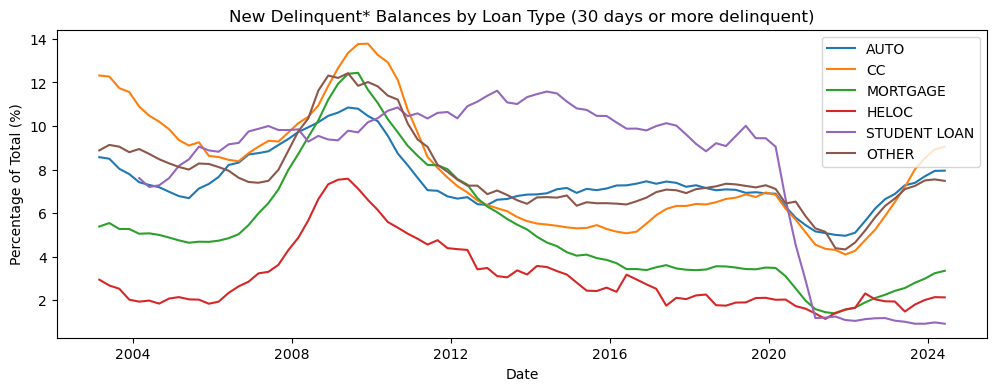

In [259]:
delinquent = pd.read_excel('data/newyorkfed_household_debit_and_credit_report.xlsx', sheet_name='Page 13 Data', header=4)
delinquent = prep_newyorkfed_data(delinquent)

for column in delinquent.columns[1:-1]:  # Excluding Date and TOTAL columns
    plt.plot(delinquent['Date'], delinquent[column], label=column)

plt.title('New Delinquent* Balances by Loan Type (30 days or more delinquent)')
plt.xlabel('Date')
plt.ylabel('Percentage of Total (%)')
plt.legend()
plt.show()

Foreclosure is when a lender takes possession of a mortgaged property due to non-payment.

Bankruptcy is where an individual or business seeks relief from debts they cannot pay.

2005 Q4 had a massive spike in bankruptcies. The Bankruptcy Abuse Prevention and Consumer Protection Act, while intended to curb perceived abuse of the bankruptcy system, ultimately had unintended consequences that worsened financial distress for many households. Many debtors rushed to file for bankruptcy before the new, more restrictive law took effect.

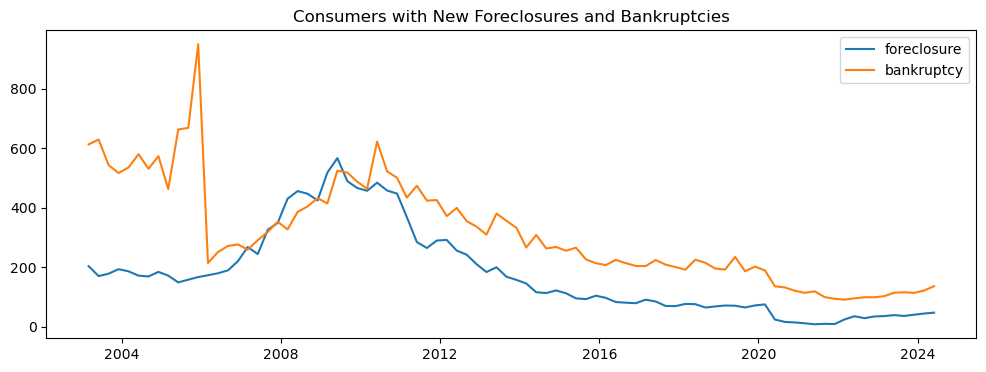

In [260]:
foreclosures = pd.read_excel('data/newyorkfed_household_debit_and_credit_report.xlsx', sheet_name='Page 17 Data', header=3)
foreclosures = prep_newyorkfed_data(foreclosures)
foreclosures
plt.plot(foreclosures['Date'], foreclosures['foreclosure'], label='foreclosure')
plt.plot(foreclosures['Date'], foreclosures['bankruptcy'], label='bankruptcy')
plt.title("Consumers with New Foreclosures and Bankruptcies")
plt.legend()
plt.show()

## Census.gov: Housing Vacancies and Homeownership (CPS/HVS)
https://www.census.gov/housing/hvs/data/prevann.html

[DEFINITIONS AND EXPLANATIONS](https://www.census.gov/housing/hvs/files/annual23/ann23def.pdf)


[Number of owner-occupied housing units in the United States](https://www.statista.com/statistics/187576/housing-units-occupied-by-owner-in-the-us-since-1975/)
Owner-occupied units has been climbing since 2015. It's now at 86% as of 2023 as compared to 75% in 2015.

The rental vacancy rate decreased 12.07% while the homeowner vacancy remained at 0.8% 

In [14]:
t2_vacancy_rates = pd.read_excel('data/census_t2_Rental_and_Homeowner_Vacancy_Rates_by_Selected_Characteristics.xlsx', 
                                 sheet_name='A', 
                                 header=7)

rental_vacancy_2022 = t2_vacancy_rates.iloc[4, 1]
rental_vacancy_2023 = t2_vacancy_rates.iloc[4, 3]
print(f"rental_vacancy_2022: {rental_vacancy_2022}%")
print(f"rental_vacancy_2023: {rental_vacancy_2023}%")
print(f"Percentage change: {100 * (rental_vacancy_2023 - rental_vacancy_2022) / rental_vacancy_2022:.02f}%")


rental_vacancy_2022: 5.8%
rental_vacancy_2023: 6.5%
Percentage change: 12.07%


### Rental Vacancy Rates (2022 -> 2023)

In [263]:
rent_vacancy_by_cost = t2_vacancy_rates.iloc[34:44, 0].reset_index() #drop=True
# monthly_rent_costs['Characteristics'] = monthly_rent_costs['Characteristics'].str.replace('.', '', regex=False)
rent_vacancy_by_cost['Characteristics'] = rent_vacancy_by_cost['Characteristics'].str.replace(r'[\.…]', '', regex=True)
rent_vacancy_by_cost['Percentage Change'] = (100 * (t2_vacancy_rates.iloc[34:44, 3] - t2_vacancy_rates.iloc[34:44, 1]) / t2_vacancy_rates.iloc[34:44, 3]).reset_index()[0]
rent_vacancy_by_cost['Percentage Change'] = rent_vacancy_by_cost['Percentage Change'].astype(float).round(2)
rent_vacancy_by_cost.drop(columns='index')

,Characteristics,Percentage Change
0,Less than $500,-20.00
1,$500 to $599,-2.17
2,$600 to $699,4.76
3,$700 to $799,-13.56
4,$800 to $899,0.00
5,$900 to $999,24.53
6,$1000 to $1249,12.28
7,$1250 to $1499,3.28
8,$1500 to $1749,27.54
9,$1750 to $1999,5.71


### Homeowner Vacancy Rate (2022 -> 2023)

In [264]:
housing_vacancy_by_cost = t2_vacancy_rates.iloc[90:100, 0].reset_index() #drop=True
housing_vacancy_by_cost['Characteristics'] = housing_vacancy_by_cost['Characteristics'].str.replace(r'[\.…]', '', regex=True)
housing_vacancy_by_cost['Percentage Change'] = (100 * (t2_vacancy_rates.iloc[90:100, 3].to_numpy() - t2_vacancy_rates.iloc[90:100, 1].to_numpy()) / t2_vacancy_rates.iloc[90:100, 3].to_numpy())
housing_vacancy_by_cost['Percentage Change'] = housing_vacancy_by_cost['Percentage Change'].astype(float).round(2)
housing_vacancy_by_cost.drop(columns='index')

,Characteristics,Percentage Change
0,All specified owner units,0.00
1,"Less than $100,000",-12.50
2,"$100,000 to $199,999",-16.67
3,"$200,000 to $249,999",-40.00
4,"$250,000 to $299,999",-16.67
5,"$300,000 to $349,999",25.00
6,"$350,000 to $399,999",16.67
7,"$400,000 to $499,999",16.67
8,"$500,000 to $599,999",16.67
9,"$600,000 or more",0.00


Northeast: Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, Vermont, New Jersey, New York, Pennsylvania.

Midwest: Illinois, Indiana, Michigan, Ohio, Wisconsin, Iowa, Kansas, Minnesota, Missouri, Nebraska, North Dakota, South Dakota.

South: Delaware, District of Columbia, Florida, Georgia, Maryland, North Carolina, South Carolina, Virginia, West Virginia, Alabama, Kentucky, Mississippi, Tennessee, Arkansas, Louisiana, Oklahoma, Texas.

West: Arizona, Colorado, Idaho, Montana, Nevada, New Mexico, Utah, Wyoming, Alaska, California, Hawaii, Oregon, Washington.

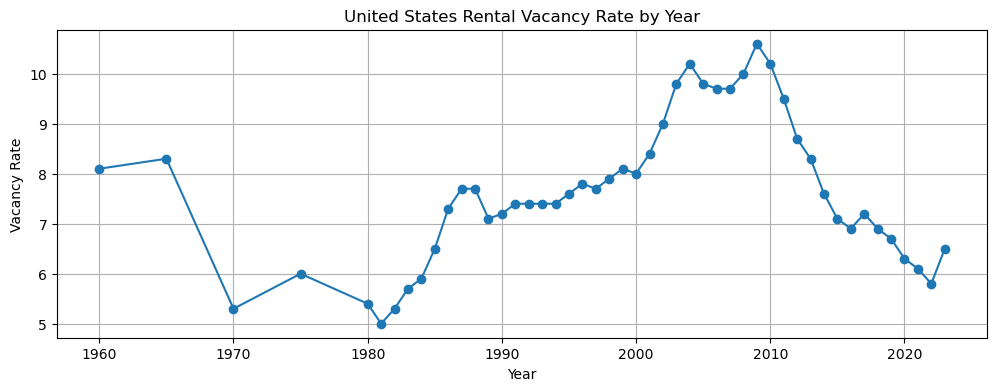

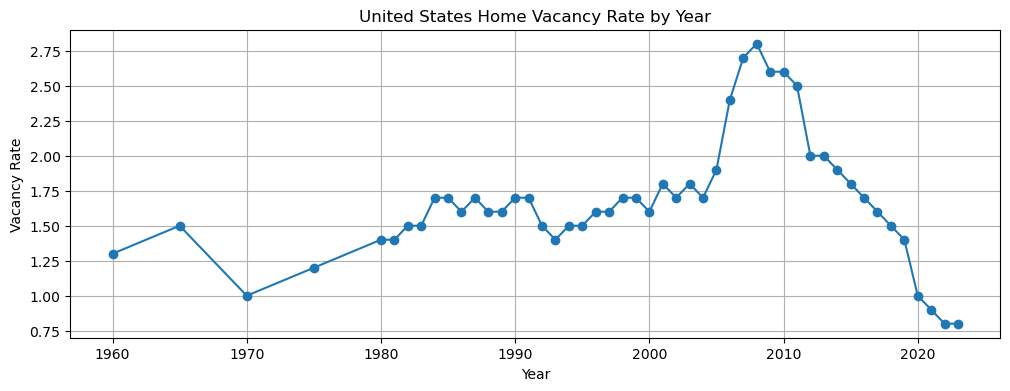

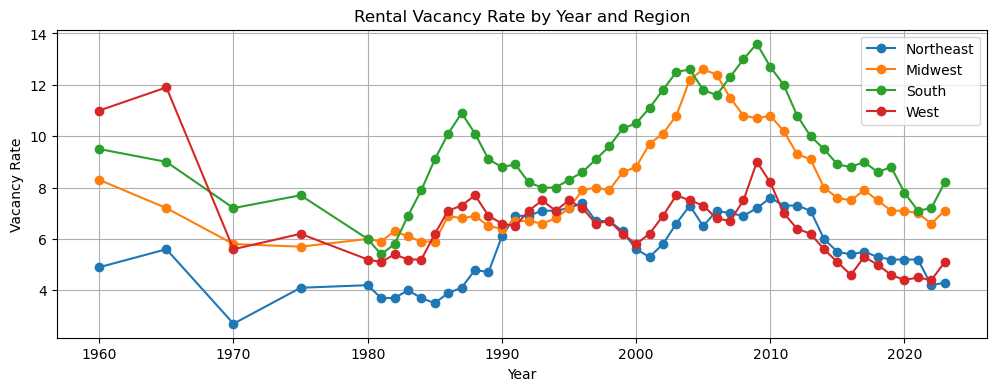

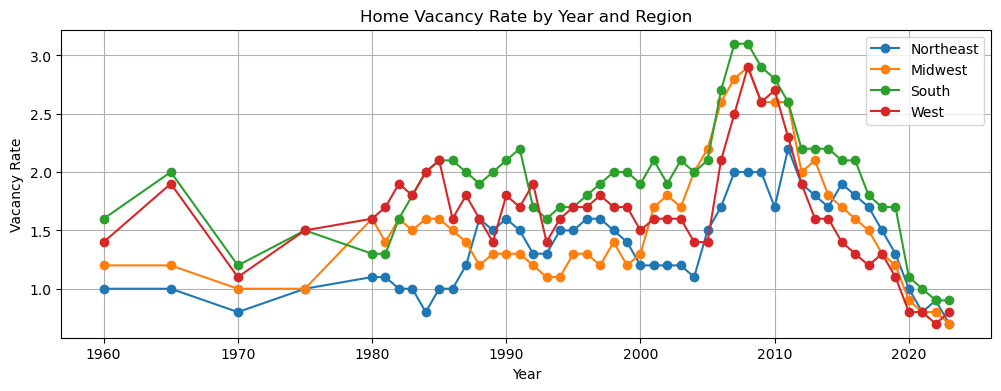

In [15]:
t1_vacancy_rates = pd.read_excel('data/census_t1_Rental_and_Homeowner_Vacancy_Rates_by_Area.xlsx', 
                                 sheet_name='A', 
                                 header=1)
t1_vacancy_rates['Year'] = t1_vacancy_rates['Year'].str.replace(r'[\.…]', '', regex=True)

# Split into rental and home dataframes
t1_vacancy_rates_rentals = t1_vacancy_rates.iloc[:12].copy()
t1_vacancy_rates_homes = t1_vacancy_rates.iloc[14:].copy()
t1_vacancy_rates_homes = t1_vacancy_rates_homes.set_index('Year').T.reset_index()
t1_vacancy_rates_rentals = t1_vacancy_rates_rentals.set_index('Year').T.reset_index()


plt.plot(t1_vacancy_rates_rentals['index'], t1_vacancy_rates_rentals['United States'], marker='o', linestyle='-')
plt.title('United States Rental Vacancy Rate by Year')
plt.xlabel('Year')
plt.ylabel('Vacancy Rate')
plt.grid(True)
plt.show()

plt.plot(t1_vacancy_rates_homes['index'], t1_vacancy_rates_homes['United States'], marker='o', linestyle='-')
plt.title('United States Home Vacancy Rate by Year')
plt.xlabel('Year')
plt.ylabel('Vacancy Rate')
plt.grid(True)
plt.show()

for i, region in enumerate(['Northeast', 'Midwest', 'South', 'West']):
    plt.plot(t1_vacancy_rates_rentals['index'], t1_vacancy_rates_rentals[region], marker='o', label=f'{region}', color=color_list[i])

plt.title('Rental Vacancy Rate by Year and Region')
plt.xlabel('Year')
plt.ylabel('Vacancy Rate')
plt.grid(True)
plt.legend()
plt.show()


for i, region in enumerate(['Northeast', 'Midwest', 'South', 'West']):
    plt.plot(t1_vacancy_rates_homes['index'], t1_vacancy_rates_homes[region], marker='o', label=f'{region}', color=color_list[i])

plt.title('Home Vacancy Rate by Year and Region')
plt.xlabel('Year')
plt.ylabel('Vacancy Rate')
plt.grid(True)
plt.legend()
plt.show()

### Probability of US Recession Predicted by Treasury Spread

https://www.newyorkfed.org/medialibrary/media/research/capital_markets/Prob_Rec.pdf

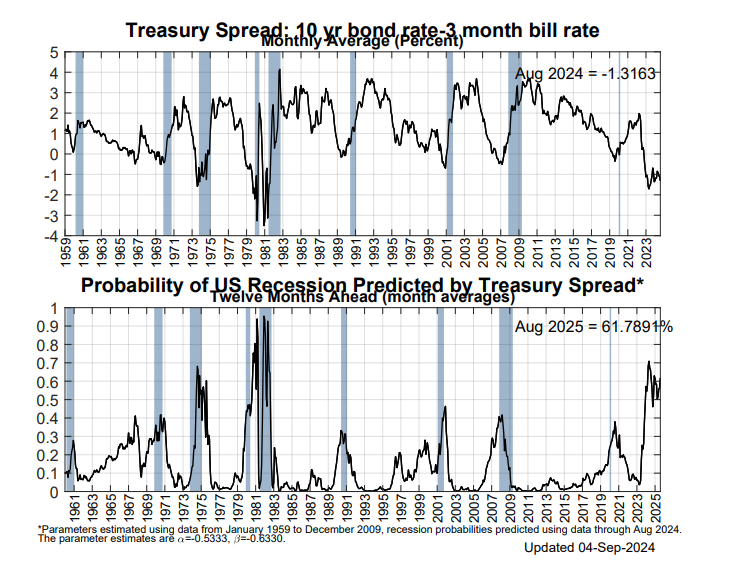

###  30-Year Fixed Rate Mortgage Average in the United States (MORTGAGE30US)	
https://fred.stlouisfed.org/series/MORTGAGE30US

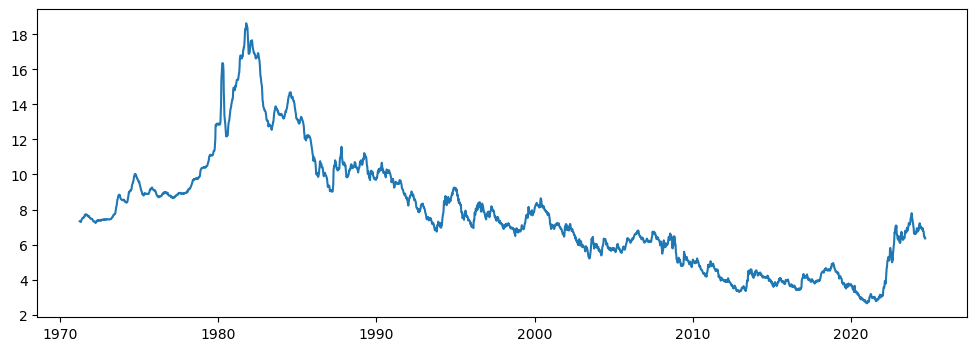

In [280]:
avg_mortage_rates = pd.read_csv('data/MORTGAGE30US.csv')
avg_mortage_rates.rename(columns={"MORTGAGE30US":'rate'}, inplace=True)
avg_mortage_rates['DATE'] = avg_mortage_rates['DATE'].astype('datetime64[us]')
plt.plot(avg_mortage_rates.DATE, avg_mortage_rates.rate)

###  Real Median Household Income in the United States (MEHOINUSA672N)	
https://fred.stlouisfed.org/series/MEHOINUSA672N


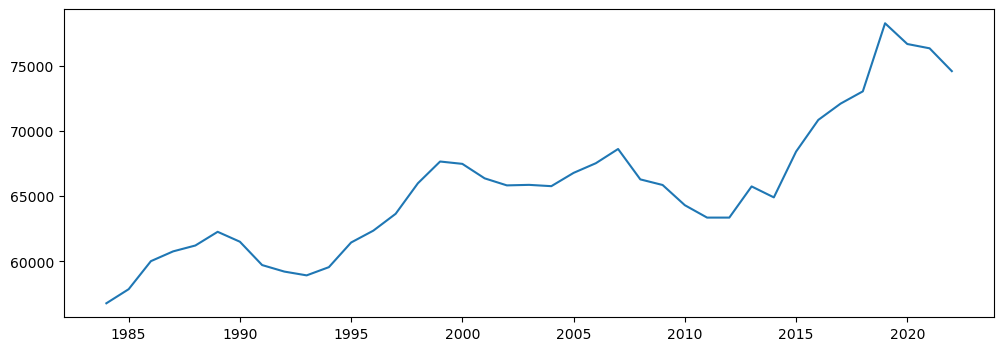

In [283]:
median_household_income = pd.read_csv('data/MEHOINUSA672N.csv')
median_household_income.rename(columns={"MEHOINUSA672N":'income'}, inplace=True)
median_household_income['DATE'] = median_household_income['DATE'].astype('datetime64[us]')
plt.plot(median_household_income.DATE, median_household_income.income)

###  Unemployment Rate (UNRATE)	
https://fred.stlouisfed.org/series/UNRATE

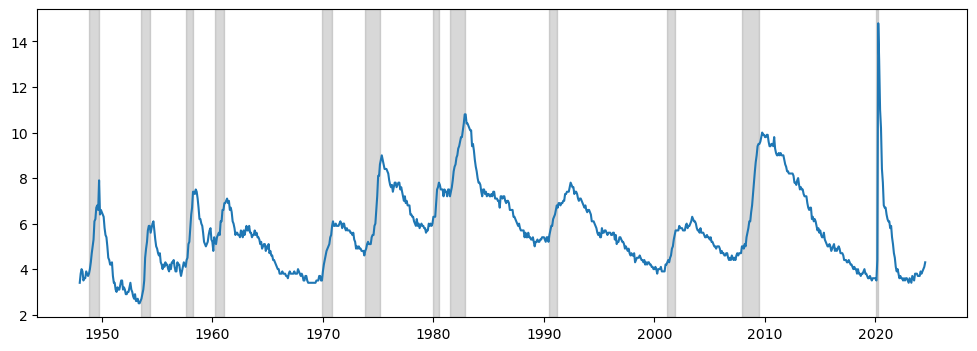

In [286]:
unemployment_rate = pd.read_csv('data/UNRATE.csv')
unemployment_rate.rename(columns={"UNRATE":'rate'}, inplace=True)
unemployment_rate['DATE'] = unemployment_rate['DATE'].astype('datetime64[us]')
plt.plot(unemployment_rate.DATE, unemployment_rate.rate)

# Adding shaded regions
for _, row in recessions.iterrows():
    if row['End'] > unemployment_rate['DATE'].min():
        plt.axvspan(row['Start'], row['End'], color='gray', alpha=0.3)

### Median Sales Price of Houses Sold for the United States (MSPUS)	
https://fred.stlouisfed.org/series/MSPUS

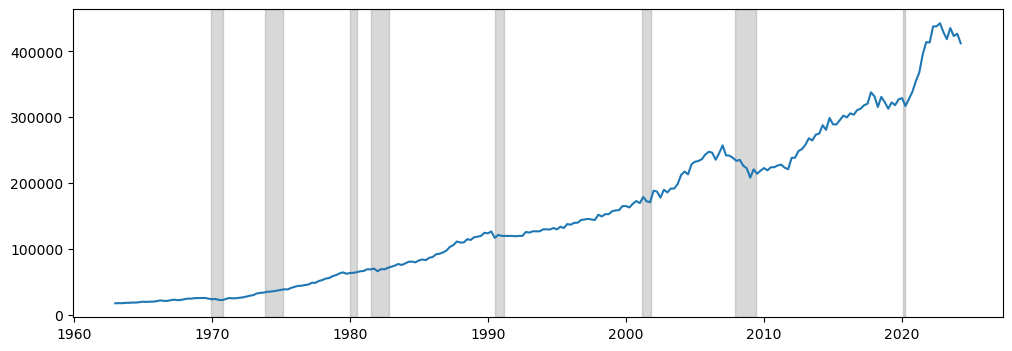

In [287]:
median_house_price = pd.read_csv('data/MSPUS.csv')
median_house_price.rename(columns={"MSPUS":'price'}, inplace=True)
median_house_price['DATE'] = median_house_price['DATE'].astype('datetime64[us]')
plt.plot(median_house_price.DATE, median_house_price.price)

# Adding shaded regions
for _, row in recessions.iterrows():
    if row['End'] > median_house_price['DATE'].min():
        plt.axvspan(row['Start'], row['End'], color='gray', alpha=0.3)
    

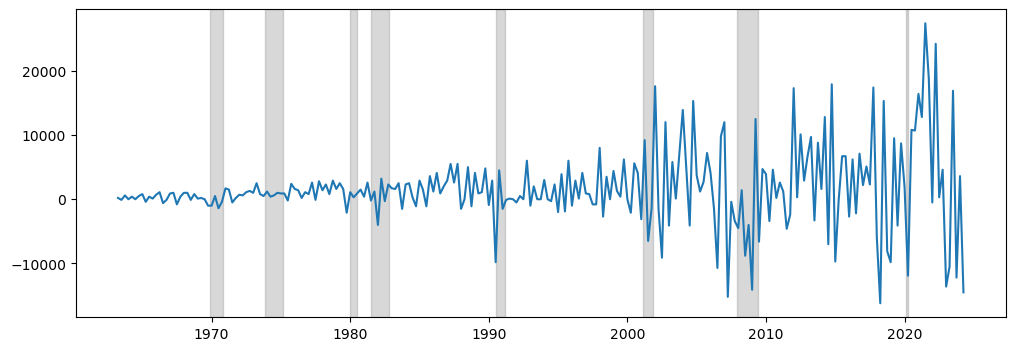

In [290]:
plt.plot(median_house_price.DATE, median_house_price.price.diff())
for _, row in recessions.iterrows():
    if row['End'] > median_house_price['DATE'].min():
        plt.axvspan(row['Start'], row['End'], color='gray', alpha=0.3)

### Housing Inventory: Median Days on Market in the United States (MEDDAYONMARUS)	
https://fred.stlouisfed.org/series/MEDDAYONMARUS

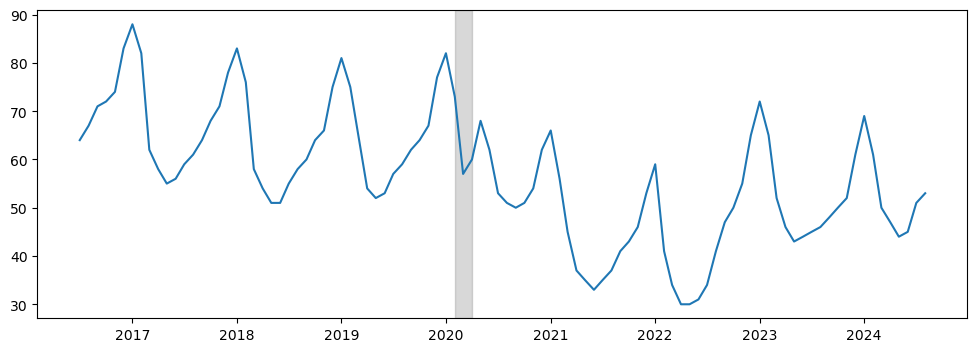

In [292]:
median_days_on_market = pd.read_csv('data/MEDDAYONMARUS.csv')
median_days_on_market.rename(columns={"MEDDAYONMARUS":'days'}, inplace=True)
median_days_on_market['DATE'] = median_days_on_market['DATE'].astype('datetime64[us]')
plt.plot(median_days_on_market.DATE, median_days_on_market.days)

# Adding shaded regions
for _, row in recessions.iterrows():
    if row['End'] > median_days_on_market['DATE'].min():
        plt.axvspan(row['Start'], row['End'], color='gray', alpha=0.3)
    

### Housing Inventory: New Listing Count in the United States (NEWLISCOUUS)	
https://fred.stlouisfed.org/series/NEWLISCOUUS

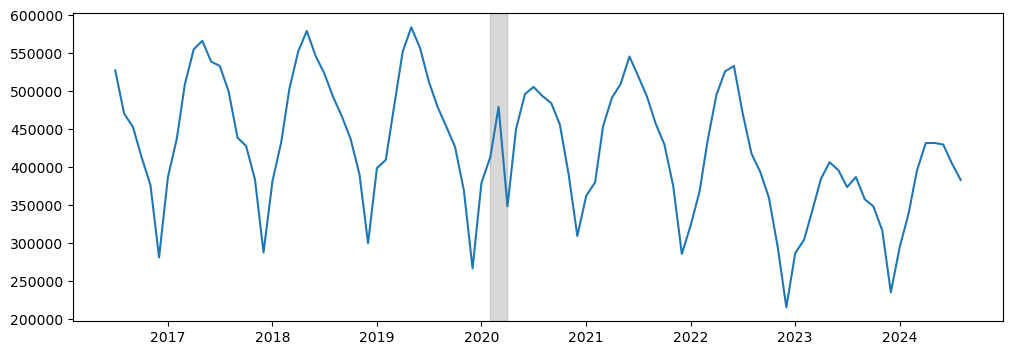

In [299]:
new_listings = pd.read_csv('data/NEWLISCOUUS.csv')
new_listings.rename(columns={"NEWLISCOUUS":'listings'}, inplace=True)
new_listings['DATE'] = new_listings['DATE'].astype('datetime64[us]')
plt.plot(new_listings.DATE, new_listings.listings)

# Adding shaded regions
for _, row in recessions.iterrows():
    if row['End'] > new_listings['DATE'].min():
        plt.axvspan(row['Start'], row['End'], color='gray', alpha=0.3)
    

### Housing Inventory: Active Listing Count in the United States (ACTLISCOUUS)	
https://fred.stlouisfed.org/series/ACTLISCOUUS

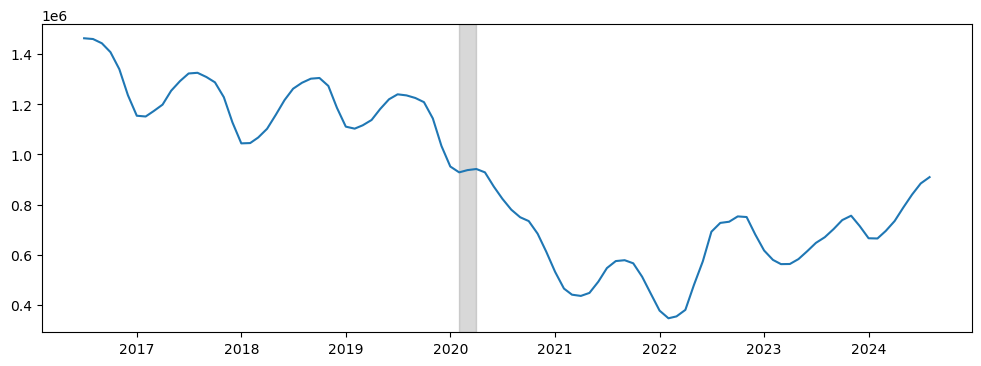

In [300]:
active_listings = pd.read_csv('data/ACTLISCOUUS.csv')
active_listings.rename(columns={"ACTLISCOUUS":'listings'}, inplace=True)
active_listings['DATE'] = active_listings['DATE'].astype('datetime64[us]')
plt.plot(active_listings.DATE, active_listings.listings)

# Adding shaded regions
for _, row in recessions.iterrows():
    if row['End'] > active_listings['DATE'].min():
        plt.axvspan(row['Start'], row['End'], color='gray', alpha=0.3)

### Housing Affordability Index (Fixed) (FIXHAI)	
https://fred.stlouisfed.org/series/FIXHAI

Value of 100 means that a family with the median income has exactly enough income to qualify for a mortgage on a median-priced home. An index above 100 signifies that family earning the median income has more than enough income to qualify for a mortgage loan on a median-priced home, assuming a 20 percent down payment. This index is calculated for fixed mortgages.

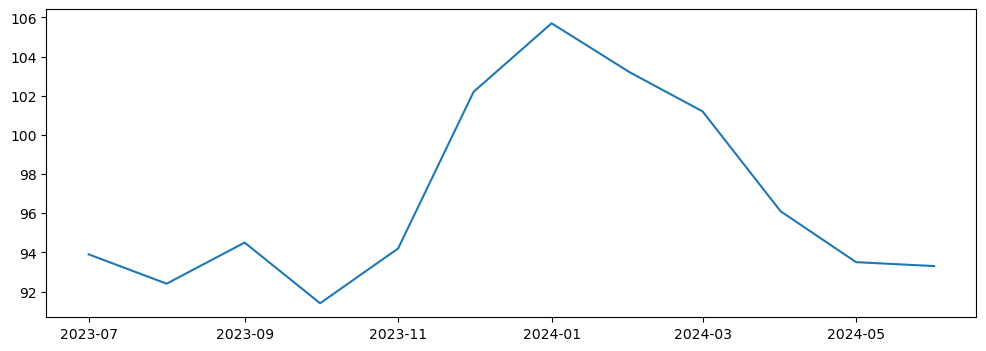

In [301]:
housing_affordability = pd.read_csv('data/FIXHAI.csv')
housing_affordability.rename(columns={"FIXHAI":'affordability'}, inplace=True)
housing_affordability['DATE'] = housing_affordability['DATE'].astype('datetime64[us]')
plt.plot(housing_affordability.DATE, housing_affordability.affordability)


### S&P CoreLogic Case-Shiller U.S. National Home Price Index (CSUSHPINSA)	
https://fred.stlouisfed.org/series/CSUSHPINSA

One of the most widely recognized measures of U.S. residential real estate prices. It tracks the sale price of the same property over time to measure the price change to reduce issues like home upgrades or quality differences between properties.

The index is calculated monthly, with a two-month lag. For example, an index released in September would reflect home prices as of July. It uses a three-month moving average to smooth out short-term fluctuations.

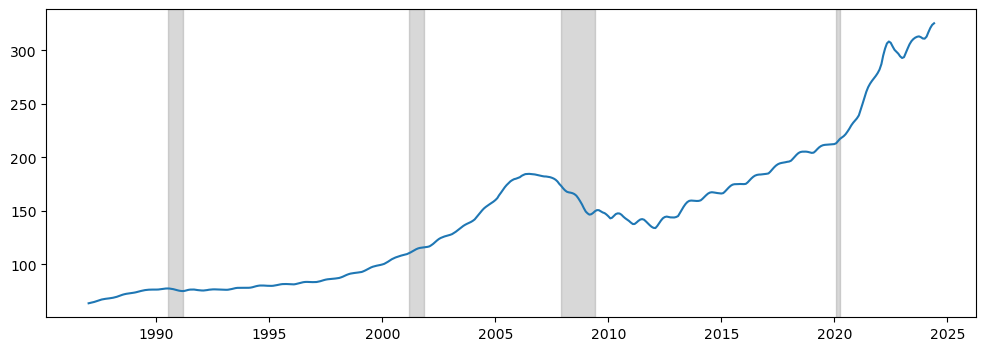

In [303]:
case_shiller = pd.read_csv('data/CSUSHPINSA.csv')
case_shiller.rename(columns={"CSUSHPINSA":'value'}, inplace=True)
case_shiller['DATE'] = case_shiller['DATE'].astype('datetime64[us]')
plt.plot(case_shiller.DATE, case_shiller.value)

# Adding shaded regions
for _, row in recessions.iterrows():
    if row['End'] > case_shiller['DATE'].min():
        plt.axvspan(row['Start'], row['End'], color='gray', alpha=0.3)

https://fredblog.stlouisfed.org/2023/07/are-home-prices-decreasing/

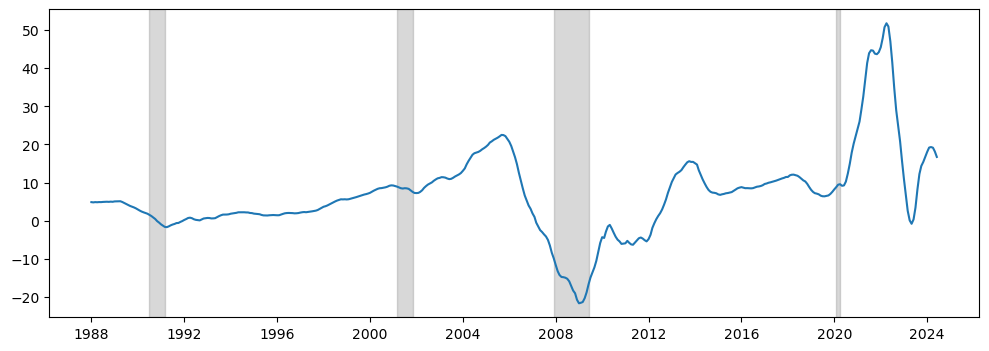

In [306]:
case_shiller['value_last_year'] = case_shiller['value'].shift(12)
case_shiller['year_over_year_change'] = case_shiller['value'] - case_shiller['value_last_year']


plt.plot(case_shiller.DATE, case_shiller.year_over_year_change)

# Adding shaded regions
for _, row in recessions.iterrows():
    if row['End'] > case_shiller['DATE'].min():
        plt.axvspan(row['Start'], row['End'], color='gray', alpha=0.3)

### Monthly Supply of New Houses in the United States (MSACSR)	
https://fred.stlouisfed.org/graph/?graph_id=1366633

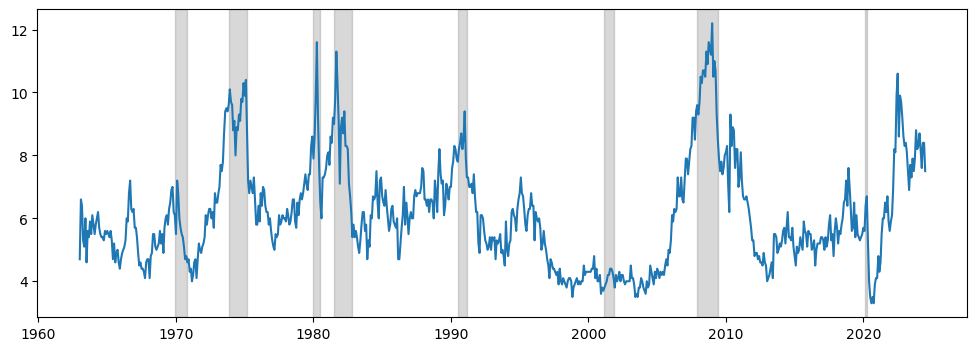

In [308]:
new_house_supply = pd.read_csv('data/MSACSR.csv')
new_house_supply.rename(columns={"MSACSR":'value'}, inplace=True)
new_house_supply['DATE'] = new_house_supply['DATE'].astype('datetime64[us]')
plt.plot(new_house_supply.DATE, new_house_supply.value)

# Adding shaded regions
for _, row in recessions.iterrows():
    if row['End'] > new_house_supply['DATE'].min():
        plt.axvspan(row['Start'], row['End'], color='gray', alpha=0.3)

### New Privately-Owned Housing Units Started: Total Units (HOUST)	
https://fred.stlouisfed.org/series/HOUST

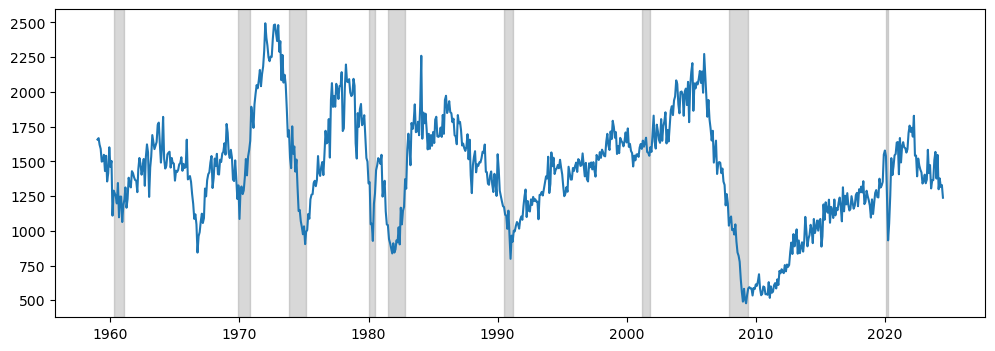

In [309]:
new_house_started = pd.read_csv('data/HOUST.csv')
new_house_started.rename(columns={"HOUST":'value'}, inplace=True)
new_house_started['DATE'] = new_house_started['DATE'].astype('datetime64[us]')
plt.plot(new_house_started.DATE, new_house_started.value)

# Adding shaded regions
for _, row in recessions.iterrows():
    if row['End'] > new_house_started['DATE'].min():
        plt.axvspan(row['Start'], row['End'], color='gray', alpha=0.3)